## **Morphological Operations:**
Morphological operations are simple transformations applied to binary or grayscale images. More specifically, we apply morphological operations to shapes and structures inside of images.         

The objective of using morphological operations is to remove the imperfections in the structure of image. Most of the operations used here are combination of two processes, dilation and erosion. The operation uses a small matrix structure called as structuring element.

We can use morphological operations to increase the size of objects in images as well as decrease them. We can also utilize morphological operations to close gaps between objects as well as open them.

By using different morphological operators like erosion, dilation, opening, closing, etc. many algorithms come into existence and can be used in many applications like license plate recognition, character recognition, handwritten digits recognition, detection of imperfection in PCBs, text extraction.

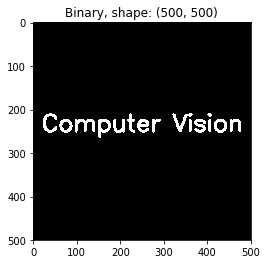

In [2]:
# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# creating empty image
empty_image= np.zeros((500,500), np.uint8)

# using cv2.putText to create a text in the empty image to work with
text_image= cv2.putText(img= empty_image, text= "Computer Vision", org= (20,250), fontFace= cv2.FONT_HERSHEY_SIMPLEX ,
                        fontScale= 1.8, color= 255, thickness= 5)

plt.title("Binary, shape: {}".format(text_image.shape))
plt.imshow(text_image,cmap= "gray")
plt.show()

Erosion,dilation,opening and closing operations expects the image to be binary. ie,. foreground to be white and background to be black

### 1. Erosion:
Erosion in an image “erodes” the foreground object and makes it smaller. pixels near the boundary of an object in an image will be discarded, “eroding” it away.

A foreground pixel in the input image will be kept only if all pixels inside the structuring element are > 0. Otherwise, the pixels are set to 0 (i.e., background).

Erosion is useful for removing small blobs in an image or disconnecting two connected objects.



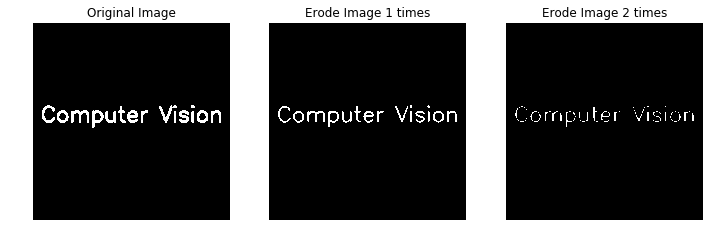

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# getting an thresholded image by taking a copy
thresh_image= text_image.copy()

# erode: Erodes the object in the image and makes it smaller

kernel= np.ones((3,3), np.uint8)



# plotting the image
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(text_image,cmap= "gray")


for i in range(1,3):
    ax = fig.add_subplot(1,3,i+1)
    eroded_txt_img= cv2.erode(src= thresh_image, kernel= kernel, iterations= i)
    ax.set_title("Erode Image {} times".format(i))
    ax.axis("off")
    ax.imshow(eroded_txt_img,cmap= "gray")



Eroding is also used to remove small blobs or noise from the image

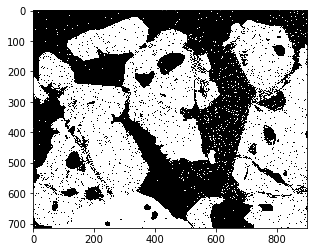

In [4]:
import cv2
import matplotlib.pyplot as plt

# reading a image and convert it to grayscale using 0
micr_image= cv2.imread("./data/microscopic_image.jpg",0)

# thresholding: to get the binary image (0/255) by exact objects with similar color in the range given
ret, th= cv2.threshold(micr_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(th,cmap= "gray")

As we can see here, there are many unwanted noise present in the image. To avoid the small blobs and to get a perfect objects we try to use erosion.

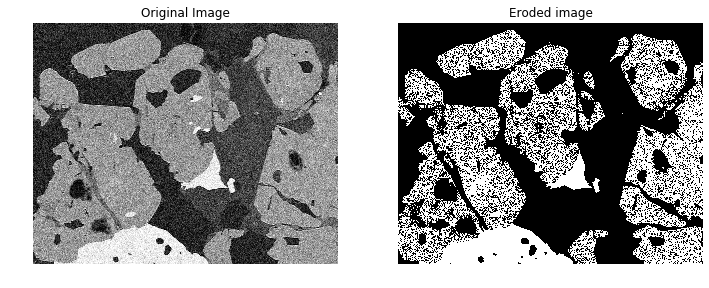

In [5]:
# Erode

kernel= np.ones((3,3), np.uint8)
eroded_image= cv2.erode(th, kernel= kernel, iterations= 1)

# plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(micr_image,cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Eroded image")
ax2.axis("off")
ax2.imshow(eroded_image,cmap= "gray")
plt.show()

Again, Erosion are most useful for removing small blobs from an image or disconnecting two connected components. From the eroded image above,as we can see the noisy gaps between the objects. it is disconnected connected components.

### 2. Dilate:
The opposite of Erosion is dilation, which grows the foreground instead of eating away (Erosion).

Dilation is mainly used to increase the size of the objects in the image, to thicken the object and to connect the blobs/ disontinuity present in the objects.      

Dilations, just as an erosion, also utilize structuring elements — a center pixel p of the structuring element is set to white if ANY pixel in the structuring element is > 0.

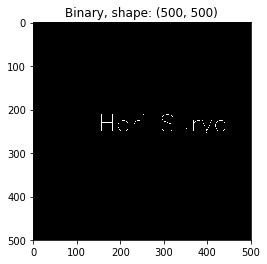

In [6]:
# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# creating empty image
empty_image= np.zeros((500,500), np.uint8)

# using cv2.putText to create a text in the empty image to work with
text_image= cv2.putText(img= empty_image, text= "Hari Surya", org= (150,250), fontFace= cv2.FONT_HERSHEY_SIMPLEX ,
                        fontScale= 1.8, color= 255, thickness= 1)

plt.title("Binary, shape: {}".format(text_image.shape))
plt.imshow(text_image,cmap= "gray")
plt.show()

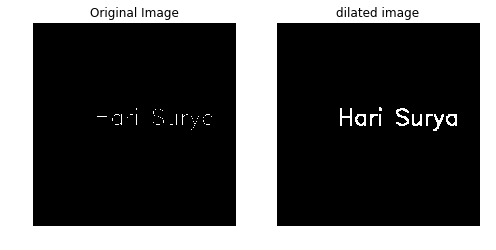

In [7]:
# dilating the image above
kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3)) # similar to np.ones((3,3),np.uint8)

to_dilate= cv2.dilate(src= text_image, kernel= kernel, iterations= 2)

# plotting
fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(text_image,cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("dilated image")
ax2.axis("off")
ax2.imshow(to_dilate,cmap= "gray")
plt.show()

Coming back to the microscopic image while we erode the image, it gets more noisy disconnected small blobs inside the objects. To avoid that we try dilation process and visualize it

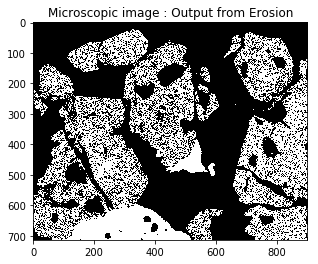

In [8]:
# plotting the output of Eroded image of microscopic image
plt.title("Microscopic image : Output from Erosion")
plt.imshow(eroded_image,cmap= "gray")
plt.show()

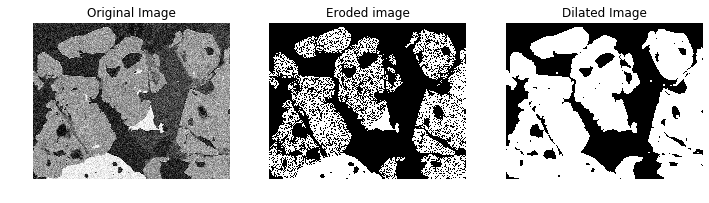

In [9]:
# dilating further the eroded image

kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3)) # similar to np.ones((3,3),np.uint8)
dilated_img= cv2.dilate(src= eroded_image, kernel= kernel, iterations= 3)

# plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(micr_image,cmap= "gray")

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Eroded image")
ax2.axis("off")
ax2.imshow(eroded_image,cmap= "gray")


ax3 = fig.add_subplot(1,3,3)
ax3.set_title("Dilated Image")
ax3.axis("off")
ax3.imshow(dilated_img,cmap= "gray")
plt.show()


As we see,we get a perfect result by performing eroding and dilating it. This process is called Opening, which will be seen in next topic

### 3. Opening:
An opening is an erosion followed by a dilation.

First an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object.

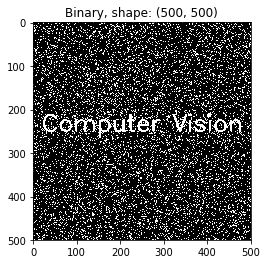

In [10]:
# Randomy setting noise in the text image

# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# creating empty image
img= np.zeros((500,500), np.uint8)

# creating random noise to the empty image
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1]).astype('uint8')
# Add the Gaussian noise to the image
noisy_image = cv2.add(img,gauss)

# using cv2.putText to create a text in the empty image to work with
text_image= cv2.putText(img= noisy_image, text= "Computer Vision", org= (20,250), fontFace= cv2.FONT_HERSHEY_SIMPLEX ,
                         fontScale= 1.8, color= 255, thickness= 4)

plt.title("Binary, shape: {}".format(text_image.shape))
plt.imshow(text_image,cmap= "gray")
plt.show()

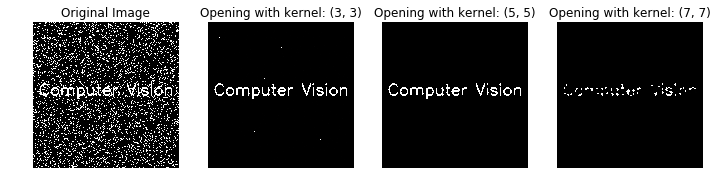

In [11]:
# Opening : dilation(Erosion)

# opening operation:


# plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,4,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(text_image,cmap= "gray")

filters= [(3,3),(5,5),(7,7)]

for i in range(0,3):
    ax = fig.add_subplot(1,4,i+2)
    kernel= cv2.getStructuringElement(shape= cv2.MORPH_CROSS, ksize= (filters[i])) # kernel: 3x3 and 5x5
    opening= cv2.morphologyEx(src= text_image, op= cv2.MORPH_OPEN, kernel= kernel, iterations= 1)
    ax.set_title("Opening with kernel: {}".format(filters[i]))
    ax.axis("off")
    ax.imshow(opening,cmap= "gray")


By visualizing the image with diferent kernel size, 5x5 is the optimal filter used for structuring element. When we increase the kernel size further to 7x7, then the objects in the image becomes disconnected

Coming back to microscopic image, what we have done before is nothing but opening operation. First we eroded the image to remove the noisy small blobs, then to extract the information correctly we then did dilation process.

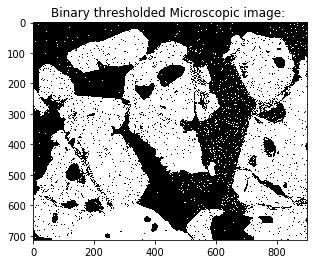

In [12]:
plt.title("Binary thresholded Microscopic image: ")
plt.imshow(th,cmap="gray")
plt.show()

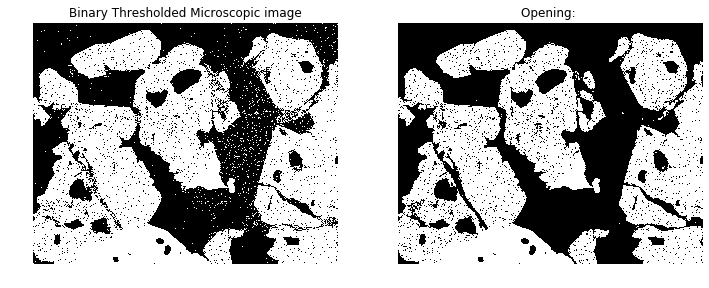

In [14]:
# this opening process is in cv2.morphologyEx
kernel= cv2.getStructuringElement(shape= cv2.MORPH_RECT, ksize= (3,3))

opening_technique= cv2.morphologyEx(src= th, op= cv2.MORPH_OPEN, kernel= kernel, iterations= 1)

fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Binary Thresholded Microscopic image")
ax1.axis("off")
ax1.imshow(th,cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Opening: ")
ax2.axis("off")
ax2.imshow(opening_technique,cmap= "gray")

### 4. Closing:
The exact opposite to an opening would be a closing. A closing is a dilation followed by an erosion.

a closing is used to close holes inside of objects or for connecting components together.

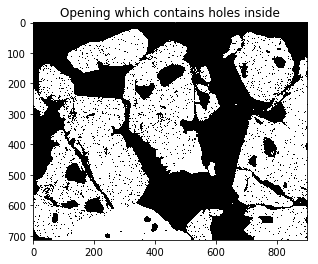

In [17]:
# Closing operation can be tried with the resultant opening image above. As, we can see holes inside the objects.Lets see if we can avoid those

# plotting the resultant opening operation
plt.title("Opening which contains holes inside")
plt.imshow(opening_technique,cmap="gray")
plt.show()

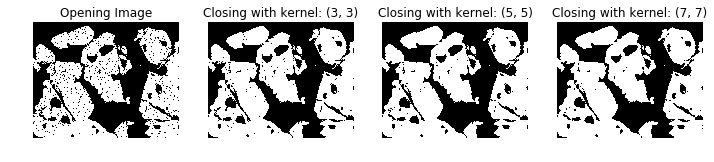

In [23]:
# closing operation

# creating filter :structuring Element 
#kernel= cv2.getStructuringElement(shape= cv2.MORPH_RECT, ksize= (3,3))

# closing: cv2.MORPH_CLOSE
#closing_technique= cv2.morphologyEx(src= opening_technique, op= cv2.MORPH_CLOSE, kernel= kernel, iterations= 1)

# plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,4,1)
ax1.set_title("Opening Image")
ax1.axis("off")
ax1.imshow(opening_technique,cmap= "gray")

filters= [(3,3),(5,5),(7,7)]

for i in range(0,3):
    ax = fig.add_subplot(1,4,i+2)
    kernel= cv2.getStructuringElement(shape= cv2.MORPH_CROSS, ksize= (filters[i])) # kernel: 3x3 and 5x5
    
    # closing after resultant opening operation to avoid the holes inside the objects: cv2.MORPH_CLOSE
    closing_technique= cv2.morphologyEx(src= opening_technique, op= cv2.MORPH_CLOSE, kernel= kernel, iterations= 1)
    ax.set_title("Closing with kernel: {}".format(filters[i]))
    ax.axis("off")
    ax.imshow(closing_technique,cmap= "gray")

#### 5.Morphological Gradient:
A morphological gradient is the **difference between a dilation and erosion**. It is useful for **determining the outline of a particular object** of an image

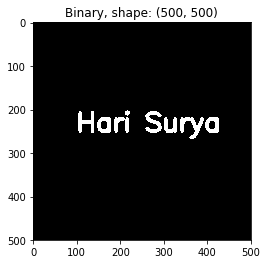

In [32]:
# To know about the Gradient operation , we take a text example here

# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# creating empty image
empty_image= np.zeros((500,500), np.uint8)

# using cv2.putText to create a text in the empty image to work with
text_image= cv2.putText(img= empty_image, text= "Hari Surya", org= (100,250), fontFace= cv2.FONT_ITALIC,
                        fontScale= 2.0, color= 255, thickness= 8)

plt.title("Binary, shape: {}".format(text_image.shape))
plt.imshow(text_image,cmap= "gray")
plt.show()

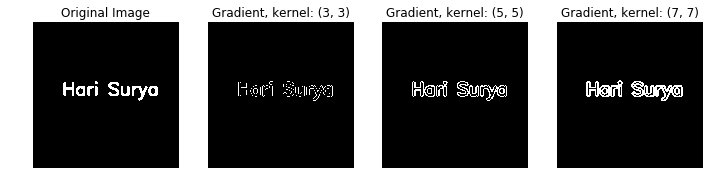

In [35]:
# getting an outline of the object by differencing the dilation and erosion operation .

fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,4,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(text_image,cmap= "gray")

filters= [(3,3),(5,5),(7,7)]

for i in range(0,3):
    ax = fig.add_subplot(1,4,i+2)
    kernel= cv2.getStructuringElement(shape= cv2.MORPH_ELLIPSE, ksize= (filters[i])) # kernel: 3x3,5x5,7x7
    gradient_op= cv2.morphologyEx(src= text_image, op= cv2.MORPH_GRADIENT, kernel= kernel, iterations= 1)
    ax.set_title("Gradient, kernel: {}".format(filters[i]))
    ax.axis("off")
    ax.imshow(gradient_op,cmap= "gray")


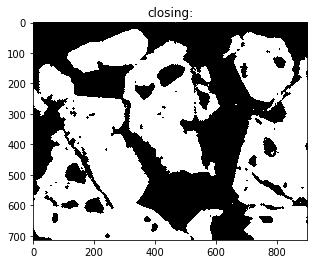

In [41]:
# from the thresholded Microscopic image


plt.title("closing:")
plt.imshow(closing_technique,cmap= "gray")
plt.show()

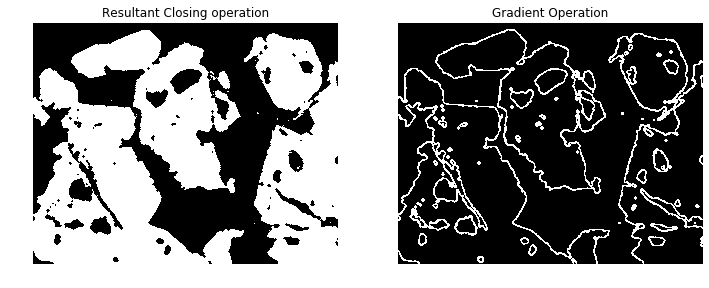

In [43]:
# getting the outline of each object from this above image
kernel= cv2.getStructuringElement(shape= cv2.MORPH_RECT, ksize= (5,5))

gradient_technique= cv2.morphologyEx(src= closing_technique, op= cv2.MORPH_GRADIENT, kernel= kernel, iterations= 1)

#plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Resultant Closing operation")
ax1.axis("off")
ax1.imshow(closing_technique,cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Gradient Operation")
ax2.axis("off")
ax2.imshow(gradient_technique,cmap= "gray")

### Morphological operations to Grayscale/single channel Images:

Up until this point we have only applied morphological operations to binary images. But we can also apply morphological operations to grayscale images as well. Both the top hat/white hat and the black hat operators are more suited for grayscale images rather than binary ones.

#### 6. Top Hat operation:
A top hat (also known as a white hat) morphological operation is the difference between the original (grayscale/single channel) input image and the opening.

A top hat operation is used to reveal bright regions of an image on dark backgrounds.


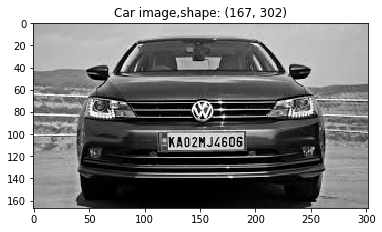

In [59]:
# Road Lanes image
import cv2
import matplotlib.pyplot as plt

# reading the image and converting to grayscale
car_img= cv2.imread("./data/car.jpg",0)

#plotting
plt.title("Car image,shape: {}".format(car_img.shape))
plt.imshow(car_img,cmap= "gray")
plt.show()

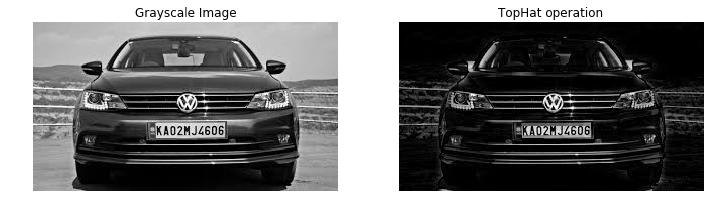

In [64]:
# By using TopHat (white hat) operation ,trying to detect the lanes in the above image

# providing over weightage to the horizontal shape coz of lane is in horizontal position
kernel= cv2.getStructuringElement(shape= cv2.MORPH_RECT, ksize= (13,5)) 

# tophat operation
tophat_technique= cv2.morphologyEx(src= car_img, op= cv2.MORPH_TOPHAT, kernel= kernel, iterations= 1)

#plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Grayscale Image")
ax1.axis("off")
ax1.imshow(car_img,cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("TopHat operation")
ax2.axis("off")
ax2.imshow(tophat_technique,cmap= "gray")
plt.show()

Morphological operations are commonly used as pre-processing steps to more powerful computer vision solutions such as OCR, Automatic Number Plate Recognition (ANPR), and barcode detection.

#### 7. Blackhat operation:
The Blackhat operation technique is oposite to that of tophat.black hat operation reveals dark regions on a light background.


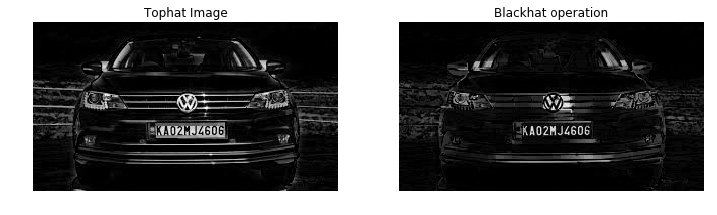

In [65]:
# By using TopHat (white hat) operation ,trying to detect the lanes in the above image

# providing over weightage to the horizontal shape coz of lane is in horizontal position
kernel= cv2.getStructuringElement(shape= cv2.MORPH_RECT, ksize= (13,5)) 

# tophat operation
blackhat_technique= cv2.morphologyEx(src= tophat_technique, op= cv2.MORPH_BLACKHAT, kernel= kernel, iterations= 1)

#plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Tophat Image")
ax1.axis("off")
ax1.imshow(tophat_technique,cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Blackhat operation")
ax2.axis("off")
ax2.imshow(blackhat_technique,cmap= "gray")
plt.show()

To reveal our license plate characters you would first segment out the license plate itself via a top hat operator and then apply a black hat operator (or thresholding) to extract the individual license plate characters (perhaps using methods like contour detection).

### Distance Transform:
The distance transform is an operator normally only applied to binary images. The result of the transform is a graylevel image that looks similar to the input image, except that the graylevel intensities of points inside foreground regions are changed to show the distance to the closest boundary from each point.

function : cv2.distanceTransform

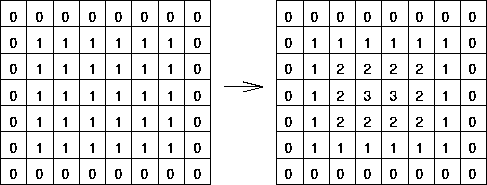


**Link:** https://www.youtube.com/watch?v=DitXZHk2m-Q